## **III. 提出的方法**

在本节中，我们首先介绍一个用于处理缺失模态的网络适配的一般框架。然后，我们讨论为什么我们专注于参数高效适配，并详细介绍我们提出的用于处理缺失模态的适配方法，并强调我们方法的关键优势。

### **A. 处理缺失模态的网络适配**

令 $\mathcal{M} = \{m_1, \ldots, m_M\}$ 表示给定多模态任务的输入模态集合。给定完整的集合 $\mathcal{M}$，我们可以训练一个模型 $f$，其参数为 $\Theta_\mathrm{M}$，将来自所有模态的输入（表示为 $\mathcal{X}_\mathrm{M}$）映射到一个输出 $y_\mathrm{M}$，如公式（1）所示：

$$y_{\mathcal{M}} = f(\mathcal{X}_{\mathcal{M}}; \Theta_{\mathcal{M}})$$

（1）

虽然我们可以在训练期间确保所有输入模态的可用性，但在测试时间，特别是在现实世界部署后，某些模态可能无法访问。由于硬件故障、数据获取成本或隐私问题，$\mathcal{M}$ 的任何子集都可能缺失。如果我们使用如公式（1）所示的在所有输入模态上训练的模型，当在测试时间缺失一个模态子集时，会观察到显著的性能下降，如表I所示。



#### **I) 天真的方法：** 

当 $\mathcal{M}$ 的一个子集缺失时，一个简单而天真的方法是为可用的输入模态训练一个新的模型。不失一般性，假设 $K \subset \mathcal{M}$ 表示缺失的模态。我们可以使用可用的输入模态 $\mathcal{S} = \mathcal{M} \setminus \mathcal{K}$ 重新训练模型 $f$，以获得一组新的参数 $\Theta_S$，如公式（2）所示：

$$y_{S} = f(\mathcal{X}_{S}; \Theta_{S})$$

（2）

其中，$\mathcal{X}_S$ 表示 $S$ 中模态的输入数据。原则上，我们可以为每个可能的 $\mathcal{S} \subset \mathcal{M}$ 训练一个模型，并在测试时使用相应的模型。然而，由于需要为大量可能的模态组合训练模型，这种方法在计算和存储资源上是不可行的。此外，在现实世界场景中，部署大量训练好的模型并在测试时选择其中一个也是不可行的。这种方法的另一个缺点是，即使我们希望 $y_S \approx y_M$，前面提到的训练过程并不能保证这一点。



#### **2) 参数高效的方法：**

我们提出了一种替代方法，以参数高效的方式为所有输入模态的子集 $\mathcal{S} \subset \mathcal{M}$ 适配一个单一模型。首先，我们选择一个在完整模态集 $\mathcal{M}$ 上训练的模型 $f$，如公式（1）所示，并冻结参数 $\Theta_{M}$。然后，我们学习少量特定于可用输入模态集 $\mathcal{S}$ 的参数 $\Delta_S$，并更新模型，如公式（3）所示：

$$\hat{y}_{\mathcal{S}} = f(\mathcal{X}_{\mathcal{S}}; \Theta_{\mathcal{M}}, \Delta_{\mathcal{S}})$$

（3）

其中，$\hat{y}_S$ 表示更新后的模型的预测。我们的目标是在最佳情况下使 $\hat{y}_S$ 接近所有模态预测 $y_{\mathcal{M}}$（即 $\hat{y}_S \approx y_{\mathcal{M}}$），并在最坏情况下使 $\hat{y}_S$ 接近由可用输入模态训练的模型的预测 $y_S$（即 $\hat{y}_S \approx y_S$）。

如果 $\Delta_S$ 中的参数数量与 $\Theta_{\mathcal{M}}$ 中的总参数数量相比显著较小，则公式（3）所示的适配方法被认为是参数高效的。在适配过程中，我们保持 $\Theta_{\mathcal{M}}$ 冻结，并证明少于 1% 的总参数对于 $\Delta_{S}$ 足以进行网络适配（见第 IV-G2 节）。

#### **3) 参数高效适配的需求：** 

近年来，已经提出了一些方法用于处理缺失模态的多模态学习（MML）。据我们所知，参数高效适配在这个问题领域仍然没有被探索。如第 II 节所述，当前用于鲁棒 MML 的方法需要使用专门的训练策略重新训练整个模型 [18], [20]，或利用额外的模块/子网络来引导多模态模型 [21], [22]。此外，这些方法不是很通用，并且在不同的缺失模态场景中表现不佳，如表 II 和 III 所示。为了解决这些问题，我们提出了参数高效适配，以增强 MML 对缺失模态的鲁棒性。我们的方法需要为不同的缺失模态场景学习非常少量的参数，而无需重新训练整个网络。此外，它也适用于各种模型架构、任务和模态组合，如第 IV 节所述。



### **B. 用于鲁棒 MML 的参数高效适配**

本节概述了我们用于处理缺失模态的多模态网络适配方法。我们解释了选择中间特征调制的原因，并将其与其他参数高效方法进行比较，突出我们方法的关键优势。

#### **多模态模型的适配：** 

据我们所知，没有参数高效适配方法被提出或应用于多模态模型适配以处理缺失模态。我们从低秩适配 [43], [48], [49], [51] 和基于特征调制的方法 [44] 中汲取灵感。这些方法可以增强深度模型的表示能力。我们扩展这些适配方法，构建一个通用框架，该框架可以转换可用模态的中间特征，以找到一个最佳特征表示，以补偿由于缺失模态而导致的性能差距。

#### **$\tilde{I})$ 训练：用于处理缺失模态的模型适配：** 

我们的方法如图1所示。不失一般性，让我们假设一个通用的多模态模型，其中每个模态通过一个单独的编码器进行特征提取，然后通过一个融合块融合提取的特征。融合的特征被传递到一个解码器头部进行预测。这个设置可以很容易地推广到具有共享编码器、不同编码器/模型架构和/或不同（早期或中间）融合策略的模型。

我们使用所有可用的模态在 $\mathcal{M}$ 中训练这个多模态网络 $f$，以学习参数 $\Theta_\mathrm{M}$，如公式（1）所示。然后，我们将 $f$ 适配到不同的可用模态子集 $\mathcal{S} \subset \mathcal{M}$。与现有方法不同，我们不尝试从其他模态/子网络生成 [19], [52]、近似 [4], [33] 或蒸馏知识 [20], [22]。我们的目标是学习一个修改后的功能，以适当地学习和融合可用输入模态的特征，以补偿任何缺失的模态。与公式（2）所示的在可用模态上重新训练整个网络不同，我们适配基础网络 $f$，并专注于学习一个最小参数集，如公式（3）所示。

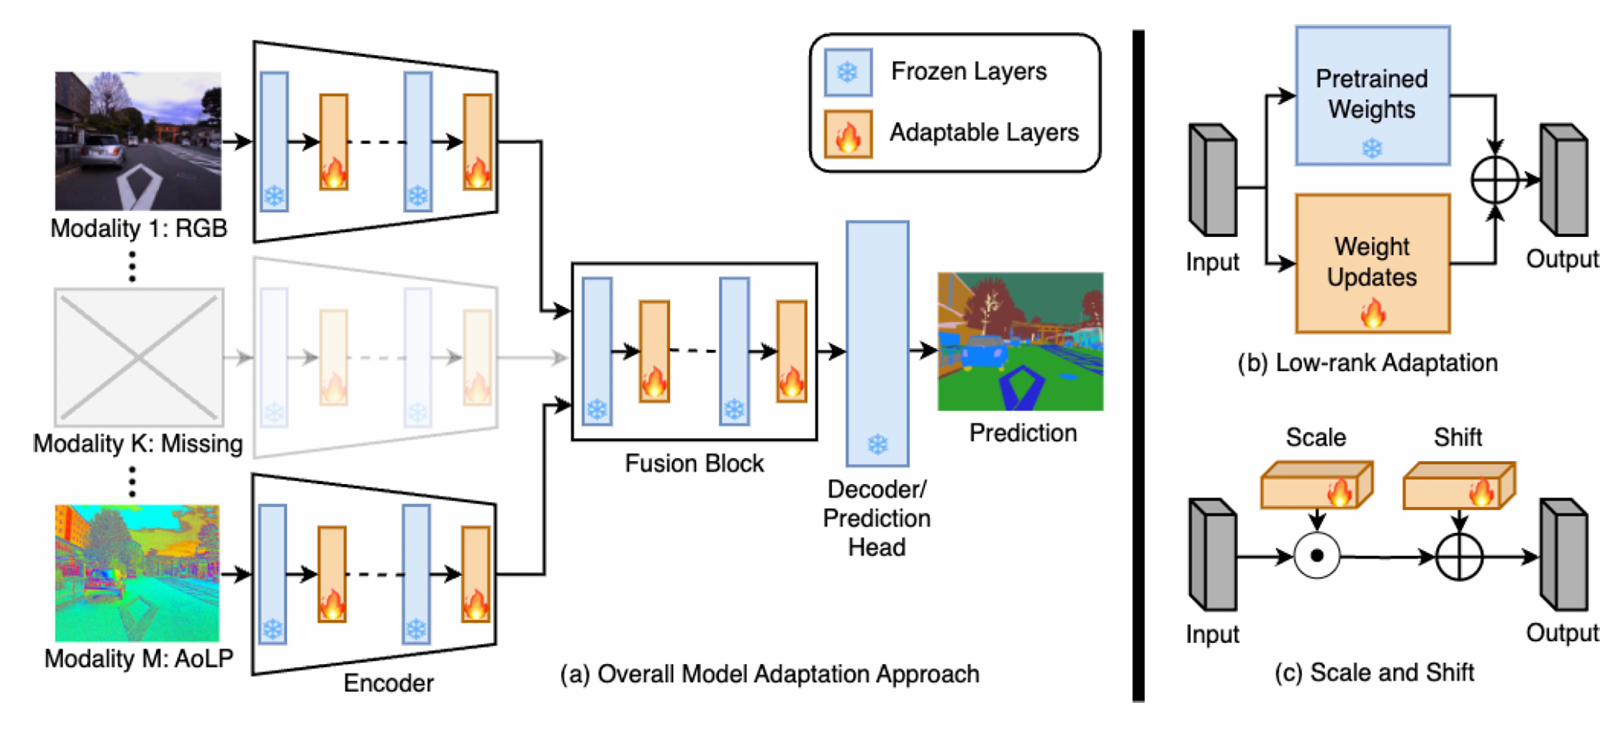

---

**图1**. (a) 我们针对鲁棒多模态学习（MML）的模型适配方法概述。一个在所有模态上预训练的模型通过少量可学习参数进行适配，以处理不同的模态组合。我们在每个编码器层和融合块之后插入可适配层，以学习作为可用输入模态函数的调制，以补偿缺失的模态。灰色分支（缺失模态）处于非活动状态，不对输出做出贡献。(b) 低秩模型适配使用冻结权重和低秩权重更新计算特征，并将它们组合在一起。(c) 缩放和平移特征适配通过逐元素乘法和加法转换输入。

---

### **适配基础模型 $f$**

如图1(a)所示，为了适配基础模型 $f$，我们冻结参数 $\Theta_{\mathcal{M}}$（标记为球，在浅蓝色矩形中），这冻结了模型中的所有层。然后，我们在每个冻结的线性、卷积和归一化层之后插入具有可学习参数 $\Delta_S$ 的可适配层（标记为 $\color{red}{\operatorname*{\:}}$，在浅橙色矩形中）。我们将缺失模态分支显示为灰色，表示它们处于非活动状态，不对模型输出做出贡献。然后，我们根据公式（3）适配 $f$，以学习 $\Delta_S$。在为给定的模态组合 $\mathcal{S}$ 学习 $\Delta_S$ 时，我们按照标准实践 [18], [20], [22], [35] 将缺失模态设置为零。我们针对不同的模态组合最小化交叉熵损失，以 $\Delta_S$ 为目标。



### **低秩/加性适配**

我们扩展低秩/加性方法，以适配多模态模型以处理缺失模态。让我们假设 $W_m$ 是来自任何层的权重矩阵，用于第 $m$ 个输入模态，其中 $m \in \mathcal{S}$。如图1(b)所示，我们为该层学习一个低秩权重更新矩阵 $\Delta W_m$，以将输入 $h_{m,\mathrm{i}}$ 转换为：

$$h_{m,o} = W_{m}h_{m,i} + \Delta W_{m}h_{m,i}, \text{对于所有} m \in \mathcal{S},$$

（4）

其中，$h_{m,o}$ 是传递到模型下一层的转换输出特征。由于 $\Delta W_m$ 是低秩的，可学习参数的总数仍然是模型参数总数的一小部分。我们可以将可学习参数 $\Delta_S = \{\Delta W_m\}_{m \in \mathcal{S}}$ 表示为所有低秩更新矩阵的集合。



### **中间特征调制**

我们扩展 SSF [44] 方法，使其与具有缺失模态的多模态模型一起工作。可适配的 SSF 层在每个层上调制来自每个可用模态的中间标记/特征，如图1(c)所示。对于第 $m$ 个输入模态，其中 $m \in \mathcal{S}$，我们将可学习的缩放和偏移参数分别表示为 $\gamma_m \in \mathbb{R}^d$ 和 $\beta_m \in \mathbb{R}^d$，其中 $d$ 是模型的嵌入维度。来自任何冻结层的第 $m$ 个输入模态的输出 $h_{m,o} \in \mathbb{R}^{N \times d}$ 通过跟随其后的 SSF 层。SSF 层对 $h_{m,o}$ 应用线性变换，如下所示：

（5）

$$h_{m,i} = \gamma_m \odot h_{m,o} + \beta_m, \text{对于所有} m \in \mathcal{S},$$

其中，$h_{m,i} \in \mathbb{R}^{N \times d}$ 是传递到模型下一层的转换特征，$N$ 是标记的数量。注意，如果任何层的输出形状为 $(H \times W \times d)$（对于卷积层），我们在应用公式（5）之前将其重塑为 $(N \times d)$，其中 $N = H \times W$。如果需要，我们在将转换特征传递到下一层之前将其重塑回原始形状。我们可以将可学习参数表示为 $\Delta_{\mathcal{S}} = \{\gamma_{\mathcal{S}}, \beta_{\mathcal{S}}\} = \{\gamma_{m}, \beta_{m}\}_{m \in \mathcal{S}}$。BitFit [51] 方法也可以用于适配，因为我们只需要学习所有 $m \in \mathcal{S}$ 的偏移/偏移项 $\beta_m$。我们修改公式（5）为：

$$h_{m,i} = h_{m,o} + \beta_{m}, \text{对于所有} m \in \mathcal{S},$$

（6）

可学习参数可以表示为 $\Delta_S = \{\beta_m\}_{m \in S}$。因此，来自每个可用模态的中间特征被调制，以找到更好的表示，以补偿缺失模态。



### **推理：处理缺失模态的模型适配**

在测试时间，我们加载具有预训练权重 $\Theta_{\mathcal{M}}$ 的基础多模态模型 $f$。如果所有模态都可用，我们可以使用 $\Theta_{\mathcal{M}}$ 进行预测。当一个模态子集缺失时，我们可以选择与可用输入模态 $\mathcal{S}$ 对应的学习参数 $\Delta_S$，将它们插入模型，并使用它们进行预测，如下所示：

$$\hat{y}_{\mathcal{S}} = \left\{\begin{matrix}f(\mathcal{X}_{\mathcal{S}}; \Theta_{\mathcal{M}}) & \text{如果} \mathcal{S} = \mathcal{M}, \\ f(\mathcal{X}_{\mathcal{S}}; \Theta_{\mathcal{M}}, \Delta_{\mathcal{S}}) & \text{如果} \mathcal{S} \subset \mathcal{M}.\end{matrix}\right.$$

（7）

由于我们在每个层之后插入可适配层，因此不需要对模型架构进行任何重大更改，并且可以轻松完成，而无需重新加载所有模型参数 $\Theta_{\mathcal{M}}$。我们只需要加载参数 $\Delta_S$，并将它们插入模型。由于我们只插入了非常少量的额外参数，因此它添加了非常有限的计算开销。此外，如果不同的模态子集变得可用，调整是直接的。我们只需要用可用模态集对应的参数替换现有的学习参数 $\Delta_S$，确保在测试阶段处理各种可用模态组合的适应性和灵活性。

我们只在编码器和融合块中插入可适配层，同时保持解码器/预测头不变。我们观察到，使用预训练的解码器/预测头在存在几个缺失模态时提供了良好的整体性能。



### **特征调制与低秩适配的比较**

虽然我们在 ${(4),(5)}$ 中提出了三种适配方法，但我们选择中间特征调制与 SSF（公式5）作为我们实验的主要方法。我们主要选择这种方法是因为它简单且有效。我们的实验表明，与总结在表 S3 中的其他参数高效适配方法相比，通过简单的线性变换进行特征变换在大多数情况下表现良好。我们在补充部分的表 S4、S5 和 S6 中提供了详细的比较，包括平均准确度、F1 分数和 % mIoU。SSF 在增强表示能力 [49]、更快的收敛速度 [48]、防止在表示学习过程中丢失信息 [50] 以及缓解上下游任务之间的分布不匹配 [44] 方面表现出巨大潜力。这些特性促使我们将这种方法扩展到具有缺失模态的 MML，并构建一个非常有效的通用框架，以学习适当的可用输入模态的调制，以弥合由于缺失模态而导致的性能差距。

这种方法的一些关键优势如下。首先，参数 $\{\gamma,\beta\}$ 独立于输入特征/模态，使其适用于各种任务和输入模态组合。其次，我们可以轻松地在现有模型中插入这些可学习层，而无需更改模型架构。我们可以轻松切换/选择给定输入模态组合的相应 SSF 参数。最后，它引入了极其少量的额外可学习参数。与为每个输入组合训练单独的模型或使用一些专门的训练策略（如模态丢弃 [17], [18] 或知识蒸馏 [20], [22]）重新训练模型相比，结果适配提供了显著的节省。